In [1]:
import ROOT

Welcome to JupyROOT 6.10/02


In [2]:
%jsroot off

In [3]:
x = ROOT.RooRealVar("x","m(jj)[GeV]",50,200)

mean = ROOT.RooRealVar("mean","mean",120,0,250)
sigma = ROOT.RooRealVar("sigma","sigma",10,0.,20)
sig = ROOT.RooGaussian("sig","signal p.d.f.",x,mean,sigma)

coef0 = ROOT.RooRealVar("c0","coefficient #0",-1.0,-2.,2)
coef1 = ROOT.RooRealVar("c1","coefficient #1",0.1,-2.,2)
coef2 = ROOT.RooRealVar("c2","coefficient #2",0.1,-2.,2)
bkg = ROOT.RooChebychev("bkg","background p.d.f.",x,ROOT.RooArgList(coef0,coef1,coef2))

fsig = ROOT.RooRealVar("fsig","signal fraction",0.9,0.,1.)

# model(x) = fsig*sig(x) + (1-fsig)*bkg(x)
model = ROOT.RooAddPdf("model","model",ROOT.RooArgList(sig,bkg),ROOT.RooArgList(fsig))
#model2 = ROOT.RooAddPdf("model2","model2",ROOT.RooArgList(sig,bkg),ROOT.RooArgList(fsig))
model3 = ROOT.RooAddPdf("model3","model3",ROOT.RooArgList(sig,bkg),ROOT.RooArgList(fsig))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [4]:
y = ROOT.RooRealVar("y","m(jj)[GeV]",50,200)

mean2 = ROOT.RooRealVar("mean2","mean",120,0,250)
sigma2 = ROOT.RooRealVar("sigma2","sigma",10,0.,20)
sig2 = ROOT.RooGaussian("sig2","signal p.d.f.",y,mean2,sigma2)

coef02 = ROOT.RooRealVar("c02","coefficient #0",-1.0,-2.,2)
coef12 = ROOT.RooRealVar("c12","coefficient #1",0.1,-2.,2)
coef22 = ROOT.RooRealVar("c22","coefficient #2",0.1,-2.,2)
bkg2 = ROOT.RooChebychev("bkg2","background p.d.f.",y,ROOT.RooArgList(coef02,coef12,coef22))

fsig2 = ROOT.RooRealVar("fsig2","signal fraction",0.9,0.,1.)

# model(x) = fsig*sig(x) + (1-fsig)*bkg(x)
model2 = ROOT.RooAddPdf("model2","model",ROOT.RooArgList(sig2,bkg2),ROOT.RooArgList(fsig2))

In [5]:
z = ROOT.RooRealVar("z","m(jj)[GeV]",50,200)

mean3 = ROOT.RooRealVar("mean3","mean",120,0,250)
sigma3 = ROOT.RooRealVar("sigma3","sigma",10,0.,20)
sig3 = ROOT.RooGaussian("sig3","signal p.d.f.",z,mean2,sigma2)

coef03 = ROOT.RooRealVar("c03","coefficient #0",-1.0,-2.,2)
coef13 = ROOT.RooRealVar("c13","coefficient #1",0.1,-2.,2)
coef23 = ROOT.RooRealVar("c23","coefficient #2",0.1,-2.,2)
bkg3 = ROOT.RooChebychev("bkg3","background p.d.f.",z,ROOT.RooArgList(coef02,coef12,coef22))

fsig3 = ROOT.RooRealVar("fsig3","signal fraction",0.9,0.,1.)

# model(x) = fsig*sig(x) + (1-fsig)*bkg(x)
model3 = ROOT.RooAddPdf("model3","model",ROOT.RooArgList(sig3,bkg3),ROOT.RooArgList(fsig3))

In [6]:
c1 = ROOT.TCanvas()
xframe = x.frame(ROOT.RooFit.Title("Composite Model"))
yframe = y.frame(ROOT.RooFit.Title("Composite Model"))
zframe = z.frame(ROOT.RooFit.Title("Composite Model"))

#model.plotOn(xframe)
#bkg.plotOn(xframe)
#xframe.Draw()

#c1.Draw()

In [7]:
f_higgs_mass = ROOT.TFile("outputKinFitNov21Reg.root")
f_higgs_mass_noReg = ROOT.TFile("outputKinFitNov21.root")
h_higgs_fit_mass_low = f_higgs_mass.Get("fit_mass_lowVpt")
t1 = f_higgs_mass_noReg.Get("t1")
t11 = f_higgs_mass.Get("t1")
ds = ROOT.RooDataSet("ds","ds",ROOT.RooArgSet(x))
ds2 = ROOT.RooDataSet("ds2","ds2",ROOT.RooArgSet(y))
ds3 = ROOT.RooDataSet("ds3","ds3",ROOT.RooArgSet(z))

Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [8]:
for e in t1:
    z.setVal(e.fit_mass_lowVpt)
    ds3.add(ROOT.RooArgSet(z))
    y.setVal(e.dijet_mass_lowVpt)
    ds2.add(ROOT.RooArgSet(y))

In [9]:
for e in t11:
    x.setVal(e.fit_mass_lowVpt)
    ds.add(ROOT.RooArgSet(x))

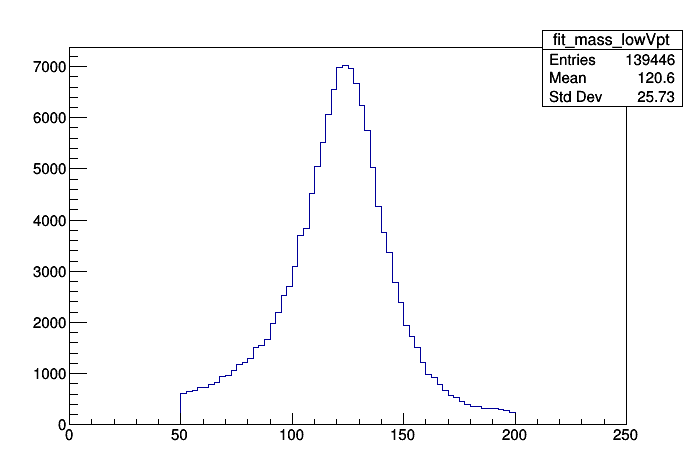

In [10]:
h_higgs_fit_mass_low.Draw()
#h_higgs_fit_mass_low_noReg.Draw("same")
c1.Draw()

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_higgs_fit_mass_low): fit range of variable x expanded to nearest bin boundaries: [50,200] --> [50,200]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0          -1.00000e+00  4.00000e-01   -2.00000e+00  2.00000e+00
     2 c1           1.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     3 c2           1.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     4 fsig         9.00000e-01  5.00000e-02    0.00000e+00  1.00000e+00
     5 mean         1.20000e+02  2.50000e+01    0.00000e+00  2.50000e+02
     6 sigma        1.00000e+01  2.00000e+00    0.00000e+00  2.00000e+01
 **********
 **    3 **SET ERR    

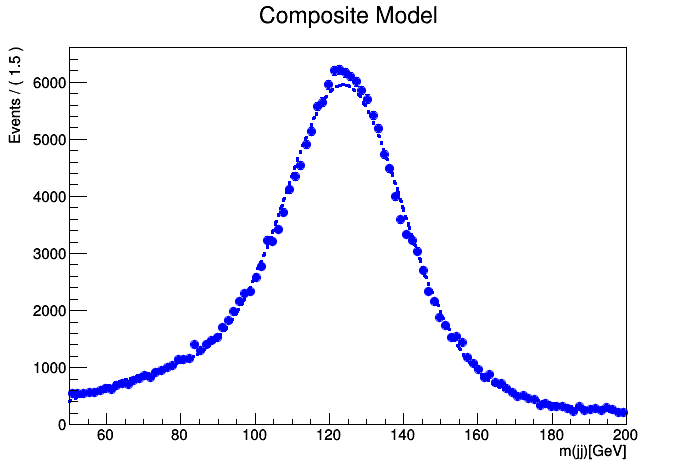

In [11]:
d_higgs_fit_mass_low = ROOT.RooDataHist("d_higgs_fit_mass_low","higgs_fit_mass_low",ROOT.RooArgList(x),h_higgs_fit_mass_low)
#model.fitTo(d_higgs_fit_mass_low)
model.fitTo(ds)
ds.plotOn(xframe,ROOT.RooFit.MarkerColor(ROOT.kBlue),ROOT.RooFit.LineColor(ROOT.kBlue),ROOT.RooFit.FillColor(0))

#d_higgs_fit_mass_low.plotOn(xframe,ROOT.RooFit.MarkerColor(ROOT.kBlue),ROOT.RooFit.LineColor(ROOT.kBlue),ROOT.RooFit.FillColor(0))
model.plotOn(xframe,ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))
xframe.Draw()
c1.Draw()

In [ ]:
#c1 = ROOT.TCanvas()
#xframe = x.frame(ROOT.RooFit.Title("Composite Model"))
#model.plotOn(xframe)
#bkg.plotOn(xframe)
#xframe.Draw()

#c1.Draw()

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig2,bkg2)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c02         -1.00000e+00  4.00000e-01   -2.00000e+00  2.00000e+00
     2 c12          1.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     3 c22          1.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     4 fsig2        9.00000e-01  5.00000e-02    0.00000e+00  1.00000e+00
     5 mean2        1.20000e+02  2.50000e+01    0.00000e+00  2.50000e+02
     6 sigma2       1.00000e+01  2.00000e+00    0.00000e+00  2.00000e+01
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1:

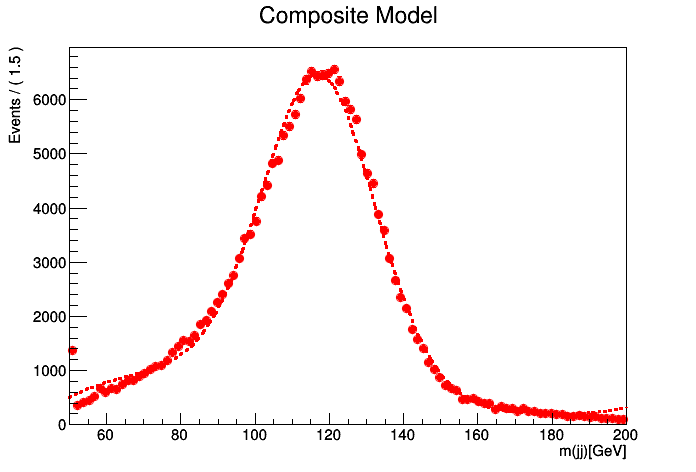

In [12]:

h_higgs_mass_low = f_higgs_mass.Get("dijet_mass_lowVpt")
#d_higgs_mass_low = ROOT.RooDataHist("d_higgs_mass_low","higgs_mass_low",ROOT.RooArgList(y),h_higgs_mass_low)
model2.fitTo(ds2)
ds2.plotOn(yframe,ROOT.RooFit.MarkerColor(ROOT.kRed),ROOT.RooFit.LineColor(ROOT.kRed),ROOT.RooFit.FillColor(0))
model2.plotOn(yframe,ROOT.RooFit.LineColor(ROOT.kRed),ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))
yframe.Draw()
c1.Draw()
#leg.Draw()


[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig3,bkg3)
 **********
 **   19 **SET PRINT           1
 **********
 **********
 **   20 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c02         -5.51723e-01  6.70978e-03   -2.00000e+00  2.00000e+00
     2 c12         -2.81440e-01  1.37287e-02   -2.00000e+00  2.00000e+00
     3 c22          3.89305e-01  7.96745e-03   -2.00000e+00  2.00000e+00
     4 fsig3        9.00000e-01  5.00000e-02    0.00000e+00  1.00000e+00
     5 mean2        1.17238e+02  6.12131e-02    0.00000e+00  2.50000e+02
     6 sigma2       1.50458e+01  7.16243e-02    0.00000e+00  2.00000e+01
 **********
 **   21 **SET ERR         0.5
 **********
 **********
 **   22 **SET PRINT           1
 **********
 **********
 **   23 **SET STR           1
 **********
 NOW USING STRATEGY  1:

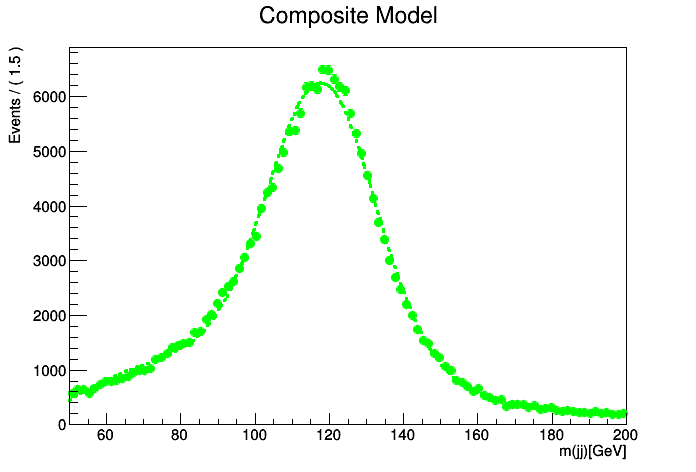

In [13]:
h_higgs_fit_mass_low_noReg = f_higgs_mass_noReg.Get("fit_mass_lowVpt")
#d_higgs_fit_mass_low_noReg = ROOT.RooDataHist("d_higgs_fit_mass_low_noReg","higgs_fit_mass_low_noReg",ROOT.RooArgList(x),h_higgs_fit_mass_low_noReg)
model3.fitTo(ds3)
ds3.plotOn(zframe,ROOT.RooFit.MarkerColor(ROOT.kGreen),ROOT.RooFit.LineColor(ROOT.kGreen),ROOT.RooFit.FillColor(0))
#model3.SetTitle("kinFit + regression")
model3.plotOn(zframe,ROOT.RooFit.LineColor(ROOT.kGreen),ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))
zframe.Draw()
c1.Draw()



Info in <TCanvas::SaveAs>: ROOT file compareLowVpt.root has been created
Info in <TCanvas::Print>: pdf file compareLowVptUnbinned.pdf has been created
Info in <TCanvas::SaveSource>: C++ Macro file: compareLowVpt.C has been generated


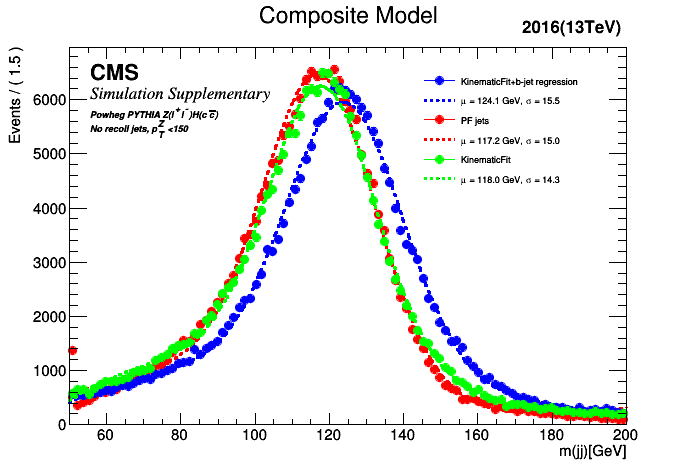

In [16]:
leg = ROOT.TLegend(0.60,0.85,0.85,0.6)
leg.SetBorderSize(0)
leg.AddEntry("h_ds","KinematicFit+b-jet regression","lpflpf")
leg.AddEntry("model_Norm[x]","#mu = 124.1 GeV, #sigma = 15.5","lpflpflpf")
leg.AddEntry("h_ds2","PF jets","lpflpflpflpf")
leg.AddEntry("model2_Norm[y]","#mu = 117.2 GeV, #sigma = 15.0","lpflpflpf")
leg.AddEntry("h_ds3","KinematicFit","lpflpflpflpflpflpf")
leg.AddEntry("model3_Norm[z]","#mu = 118.0 GeV, #sigma = 14.3","lpflpflpf")


pre = ROOT.TLatex(0.75,.93,"#scale[.8]{2016(13TeV)}")
pre.SetNDC()
prelim = ROOT.TLatex(0.13,0.83,"#scale[1]{CMS}")
prelim.SetNDC()
prelim2 = ROOT.TLatex(0.13,0.79,"#font[12]{#scale[0.8]{Simulation Supplementary}}")
prelim2.SetNDC()
prelim3 = ROOT.TLatex(0.13,0.75,"#font[72]{#scale[0.4]{Powheg PYTHIA Z(l^{+}l^{-})H(c#bar{c})}}")
prelim3.SetNDC()
prelim4 = ROOT.TLatex(0.13,0.72,"#font[72]{#scale[0.4]{No recoil jets, p_{T}^{Z} <150}}")
prelim4.SetNDC()

xframe.SetTitle("")
yframe.Draw()
xframe.Draw("same")
zframe.Draw("same")
#legg = c1.BuildLegend(0.13,0.7,0.5,0.3)
#legg.SetBorderSize(0)
#legg.DeleteEntry()
leg.Draw()
c1.SetTicks(1,1)
pre.Draw()
prelim.Draw()
prelim2.Draw()
prelim3.Draw()
prelim4.Draw()

c1.Draw()
c1.SaveAs("compareLowVpt.root")
c1.SaveAs("compareLowVptUnbinned.pdf")

c1.SaveAs("compareLowVpt.C")

In [15]:
xframe2 = x.frame(ROOT.RooFit.Title("Composite Model"))

h_higgs_mass_high = f_higgs_mass.Get("dijet_mass_highVpt")
d_higgs_mass_high = ROOT.RooDataHist("d_higgs_mass_high","higgs_mass_high",ROOT.RooArgList(x),h_higgs_mass_high)
model.fitTo(d_higgs_mass_high)
d_higgs_mass_high.plotOn(xframe2,ROOT.RooFit.MarkerColor(ROOT.kRed),ROOT.RooFit.LineColor(ROOT.kRed),ROOT.RooFit.FillColor(0))
model.plotOn(xframe2,ROOT.RooFit.LineColor(ROOT.kRed),ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))



<ROOT.RooPlot object ("frame_x_261a1b0") at 0x261a1b0>

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_higgs_mass_high): fit range of variable x expanded to nearest bin boundaries: [50,200] --> [50,200]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **   28 **SET PRINT           1
 **********
 **********
 **   29 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0          -4.96601e-01  6.96131e-03   -2.00000e+00  2.00000e+00
     2 c1          -5.22215e-01  1.30269e-02   -2.00000e+00  2.00000e+00
     3 c2           3.19892e-01  9.11982e-03   -2.00000e+00  2.00000e+00
     4 fsig         5.95905e-01  4.66072e-03    0.00000e+00  1.00000e+00
     5 mean         1.17991e+02  7.93211e-02    0.00000e+00  2.50000e+02
     6 sigma        1.43985e+01  9.42273e-02    0.00000e+00  2.00000e+01
 **********
 **   30 **SET ERR       

In [16]:
h_higgs_fit_mass_high = f_higgs_mass.Get("fit_mass_highVpt")
d_higgs_fit_mass_high = ROOT.RooDataHist("d_higgs_fit_mass_high","higgs_fit_mass_high",ROOT.RooArgList(x),h_higgs_fit_mass_high)
model2.fitTo(d_higgs_fit_mass_high)
d_higgs_fit_mass_high.plotOn(xframe2,ROOT.RooFit.MarkerColor(ROOT.kBlue),ROOT.RooFit.LineColor(ROOT.kBlue),ROOT.RooFit.FillColor(0))
model2.plotOn(xframe2,ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))


<ROOT.RooPlot object ("frame_x_261a1b0") at 0x261a1b0>

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_higgs_fit_mass_high): fit range of variable x expanded to nearest bin boundaries: [50,200] --> [50,200]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c02         -5.51723e-01  6.70978e-03   -2.00000e+00  2.00000e+00
     2 c12         -2.81440e-01  1.37287e-02   -2.00000e+00  2.00000e+00
     3 c22          3.89305e-01  7.96745e-03   -2.00000e+00  2.00000e+00
     4 fsig2        6.90189e-01  3.91562e-03    0.00000e+00  1.00000e+00
     5 mean2        1.17238e+02  6.12131e-02    0.00000e+00  2.50000e+02
     6 sigma2       1.50458e+01  7.16243e-02    0.00000e+00  2.00000e+01
     7 y            1.78143e+02  1.09286e+01    5.00000e+01  2.00000e+02
 **********
 **    3 **SET ERR         0.5
 **********
 ********

In [17]:
h_higgs_fit_mass_high_noReg = f_higgs_mass_noReg.Get("fit_mass_highVpt")
d_higgs_fit_mass_high_noReg = ROOT.RooDataHist("d_higgs_fit_mass_high_noReg","higgs_fit_mass_high_noReg",ROOT.RooArgList(x),h_higgs_fit_mass_high_noReg)
model3.fitTo(d_higgs_fit_mass_high_noReg)
d_higgs_fit_mass_high_noReg.plotOn(xframe2,ROOT.RooFit.MarkerColor(ROOT.kGreen),ROOT.RooFit.MarkerColor(ROOT.kGreen),ROOT.RooFit.LineColor(ROOT.kGreen),ROOT.RooFit.FillColor(0))
model3.plotOn(xframe2,ROOT.RooFit.LineColor(ROOT.kGreen),ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))

<ROOT.RooPlot object ("frame_x_261a1b0") at 0x261a1b0>

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_higgs_fit_mass_high_noReg): fit range of variable x expanded to nearest bin boundaries: [50,200] --> [50,200]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0          -5.83609e-01  1.01889e-02   -2.00000e+00  2.00000e+00
     2 c1          -5.75524e-01  1.72759e-02   -2.00000e+00  2.00000e+00
     3 c2           4.02417e-01  1.22399e-02   -2.00000e+00  2.00000e+00
     4 fsig         6.24008e-01  4.91874e-03    0.00000e+00  1.00000e+00
     5 mean         1.21137e+02  9.31625e-02    0.00000e+00  2.50000e+02
     6 sigma        1.25705e+01  9.48560e-02    0.00000e+00  2.00000e+01
 **********
 **    3 **SET 

Info in <TCanvas::SaveAs>: ROOT file compare.root has been created
Info in <TCanvas::Print>: pdf file compareHighVpt.pdf has been created


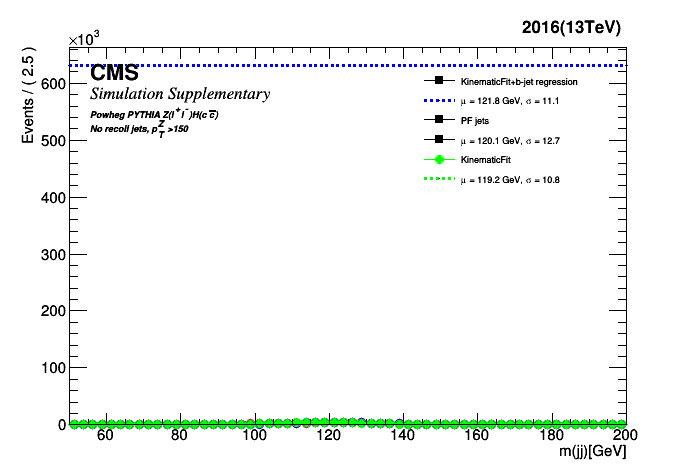

In [18]:
leg = ROOT.TLegend(0.60,0.85,0.85,0.6)
leg.SetBorderSize(0)
leg.AddEntry("h_d_higgs_fit_mass_low","KinematicFit+b-jet regression","lpflpf")
leg.AddEntry("model_Norm[x]","#mu = 121.8 GeV, #sigma = 11.1","lpflpflpf")
leg.AddEntry("h_d_higgs_mass_low","PF jets","lpflpflpflpf")
leg.AddEntry("model2_Norm[x]","#mu = 120.1 GeV, #sigma = 12.7","lpflpflpf")
leg.AddEntry("h_d_higgs_fit_mass_low_noReg","KinematicFit","lpflpflpflpflpflpf")
leg.AddEntry("model3_Norm[x]","#mu = 119.2 GeV, #sigma = 10.8","lpflpflpf")


pre = ROOT.TLatex(0.75,.93,"#scale[.8]{2016(13TeV)}")
pre.SetNDC()
prelim = ROOT.TLatex(0.13,0.83,"#scale[1]{CMS}")
prelim.SetNDC()
prelim2 = ROOT.TLatex(0.13,0.79,"#font[12]{#scale[0.8]{Simulation Supplementary}}")
prelim2.SetNDC()
prelim3 = ROOT.TLatex(0.13,0.75,"#font[72]{#scale[0.4]{Powheg PYTHIA Z(l^{+}l^{-})H(c#bar{c})}}")
prelim3.SetNDC()
prelim4 = ROOT.TLatex(0.13,0.72,"#font[72]{#scale[0.4]{No recoil jets, p_{T}^{Z} >150}}")
prelim4.SetNDC()

xframe2.SetTitle("")
xframe2.Draw()
#legg = c1.BuildLegend(0.13,0.7,0.5,0.3)
#legg.SetBorderSize(0)
#legg.DeleteEntry()
leg.Draw()
c1.SetTicks(1,1)
pre.Draw()
prelim.Draw()
prelim2.Draw()
prelim3.Draw()
prelim4.Draw()


#xframe2.Draw()
#c1.BuildLegend()
c1.Draw()
c1.SaveAs("compare.root")
c1.SaveAs("compareHighVpt.pdf")

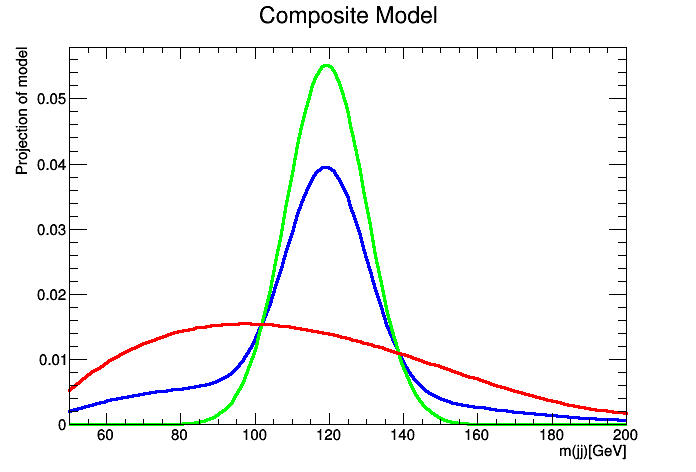

In [16]:
xframe3 = x.frame(ROOT.RooFit.Title("Composite Model"))

model.plotOn(xframe3)
sig.plotOn(xframe3,ROOT.RooFit.LineColor(ROOT.kGreen))
bkg.plotOn(xframe3,ROOT.RooFit.LineColor(ROOT.kRed))
xframe3.Draw()
c1.Draw()